### CONTENTS
#### 1 Importing Libraries
#### 2 Importing Data 
#### 3 Data Wrangling
#### 4 Fitting Handwriting Discriminator Model
#### 5 Testing Model on New Stimuli

# 1 Importing Libraries

In [180]:
import os
import operator
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image

from numpy import unique, reshape, argmax, asarray

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Conv2D, Dense, Dropout, BatchNormalization, Flatten, MaxPooling2D, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import load_model


# 2 Importing Data

In [183]:
tf.random.set_seed(42)

In [185]:
hand = mnist.load_data()

In [187]:
hand[0]

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

# 3 Data Wrangling

In [190]:
(X_train, y_train), (X_test, y_test) = hand

In [192]:
np.set_printoptions(edgeitems=3)
np.core.arrayprint._line_width = 180000

In [194]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [196]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [198]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

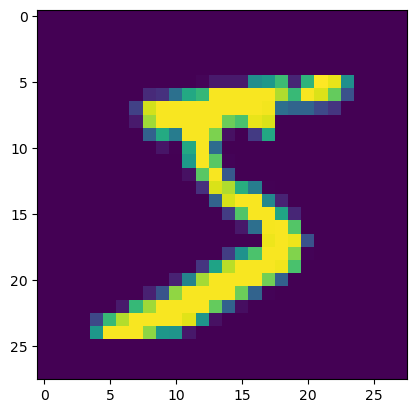

In [200]:
plt.imshow(X_train[0])

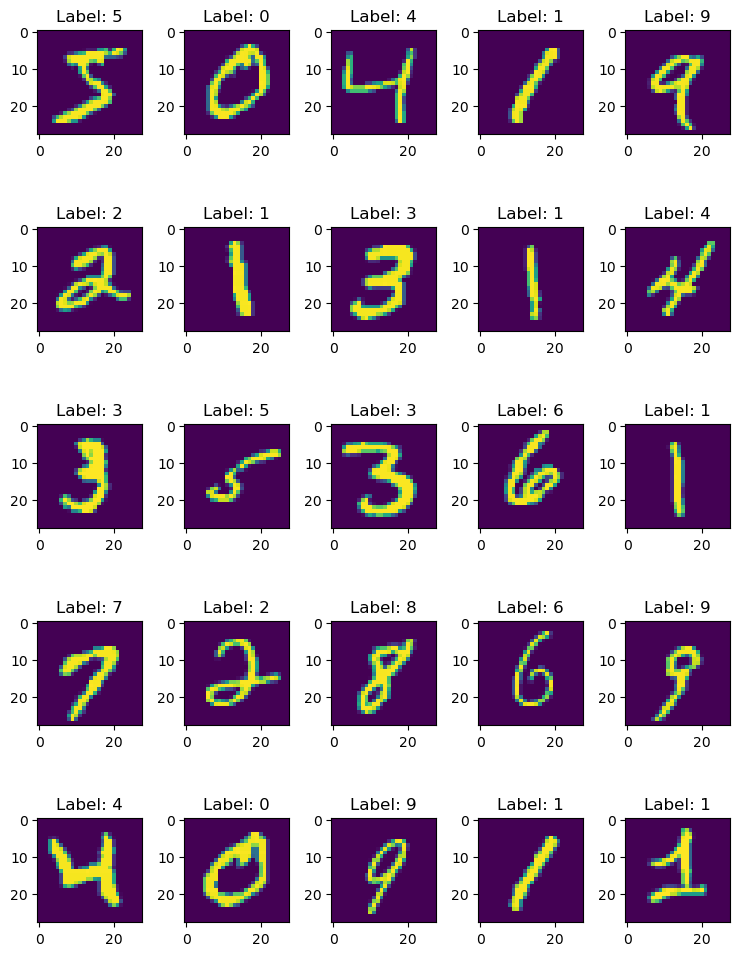

In [202]:
num = 25
images = X_train[:num]
labels = y_train[:num]

num_row = 5
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i])#, cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [204]:
# 5. Preprocess input data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [206]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [208]:
X_train /= 255
X_test /= 255

In [210]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

In [212]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [214]:
for label in range(10):
    one_hot = (Y_train[label]).astype(np.int32)
    print("label: ", label, " in one-hot representation: ", one_hot)

label:  0  in one-hot representation:  [0 0 0 0 0 1 0 0 0 0]
label:  1  in one-hot representation:  [1 0 0 0 0 0 0 0 0 0]
label:  2  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]
label:  3  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  4  in one-hot representation:  [0 0 0 0 0 0 0 0 0 1]
label:  5  in one-hot representation:  [0 0 1 0 0 0 0 0 0 0]
label:  6  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  7  in one-hot representation:  [0 0 0 1 0 0 0 0 0 0]
label:  8  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  9  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]


# 4 Fitting Handwriting Discriminator Model

In [217]:
epochs = 30
batch_size = 16
n_hidden = 32

#timesteps = len(X_train[0])
#input_dim = len(X_train[0][0])
#n_classes = _count_classes(Y_train)

# 7. Define model architecture
model = Sequential()
 
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
 
# 8. Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\elena\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [219]:
# 9. Fit model on training data
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.8698 - loss: 0.4129
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9725 - loss: 0.0908
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9802 - loss: 0.0666
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9834 - loss: 0.0549
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9863 - loss: 0.0459
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9861 - loss: 0.0428
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9877 - loss: 0.0382
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9893 - loss: 0.0353
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9898 - loss: 0.0322
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9908 - loss: 0.0285


In [221]:
# 10. Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=2)

313/313 - 1s - 4ms/step - accuracy: 0.9910 - loss: 0.0299


In [222]:
#predict first 4 images in the test set
model.predict(X_test[:4])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


array([[4.61716948e-14, 8.05396652e-11, 4.52973596e-12, 3.26692295e-09,
        2.20150097e-14, 4.38801988e-15, 1.29941621e-19, 1.00000000e+00,
        8.78872492e-15, 6.01047379e-10],
       [2.15258172e-12, 3.32276345e-10, 1.00000000e+00, 2.17348718e-15,
        3.40814725e-13, 3.35840996e-23, 6.61850945e-14, 4.67494212e-16,
        3.97669560e-15, 5.67047820e-19],
       [2.25579208e-10, 9.99999166e-01, 3.84315202e-09, 1.06606746e-09,
        1.06248166e-07, 6.22431173e-09, 1.26863100e-07, 6.13129203e-07,
        3.42608253e-08, 1.24044219e-09],
       [9.99996781e-01, 2.54883718e-11, 1.34211997e-09, 7.68995805e-12,
        1.41249651e-11, 3.24494229e-12, 3.10531505e-06, 5.77317534e-11,
        3.38951156e-09, 6.02280821e-08]], dtype=float32)

In [225]:
sumarray = np.sum(model.predict(X_test[:4]), axis=1)
sumarray

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([1.        , 1.        , 1.        , 0.99999994], dtype=float32)

In [227]:
#actual results for first 4 images in test set
y_test[:4]

array([7, 2, 1, 0], dtype=uint8)

In [229]:
test_predictions = model.predict(X_test)
cm = confusion_matrix(y_test, np.argmax(test_predictions,axis=1))
print(cm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[ 976    0    0    1    0    0    2    0    1    0]
 [   0 1130    1    0    0    0    2    2    0    0]
 [   1    0 1028    0    0    0    0    3    0    0]
 [   0    0    1 1005    0    3    0    0    1    0]
 [   0    0    1    0  966    0    2    2    4    7]
 [   1    0    0    4    0  884    2    0    1    0]
 [   4    2    0    1    1    2  947    0    1    0]
 [   0    1    4    2    0    0    0 1017    1    3]
 [   2    0    2    1    0    0    1    1  966    1]
 [   2    0    0    4    2    5    0    1    4  991]]


# 5 Testing Model on New Stimuli

In [232]:
# Path to your base directory
base_path = r'C:\Users\elena\Documents\06.2025 climatewins machine learning'


In [234]:
# Folder where images are stored
img_folder = os.path.join(base_path, '01 Project Management')

In [236]:
# Sort images numerically so 1.JPG, 2.JPG ... are in correct order
image_files = sorted(
    [f for f in os.listdir(img_folder) if f.lower().endswith('.jpg')],
    key=lambda x: int(os.path.splitext(x)[0])  # extract number before .JPG
)


In [238]:
processed_images = []

for img_name in image_files:
    img_path = os.path.join(img_folder, img_name)

    # Open, convert to grayscale ('L' mode), resize to MNIST format
    img_gray = Image.open(img_path).convert('L').resize((28, 28))

    # Convert to numpy array
    img_array = np.asarray(img_gray).astype('float32')

    # Normalize pixel values to 0–1
    img_array = img_array / 255.0

    # Add channel dimension: (28, 28, 1)
    img_array = img_array.reshape(28, 28, 1)

    processed_images.append(img_array)


In [240]:
# Convert to NumPy array with shape (num_images, 28, 28, 1)
X_test = np.array(processed_images)


In [242]:
# Predict on all images
predictions = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [244]:
# Get predicted classes
predicted_classes = np.argmax(predictions, axis=1)

In [246]:
# Get predicted classes and confidence scores
predicted_classes = np.argmax(predictions, axis=1)
confidence_scores = np.max(predictions, axis=1)  # highest probability

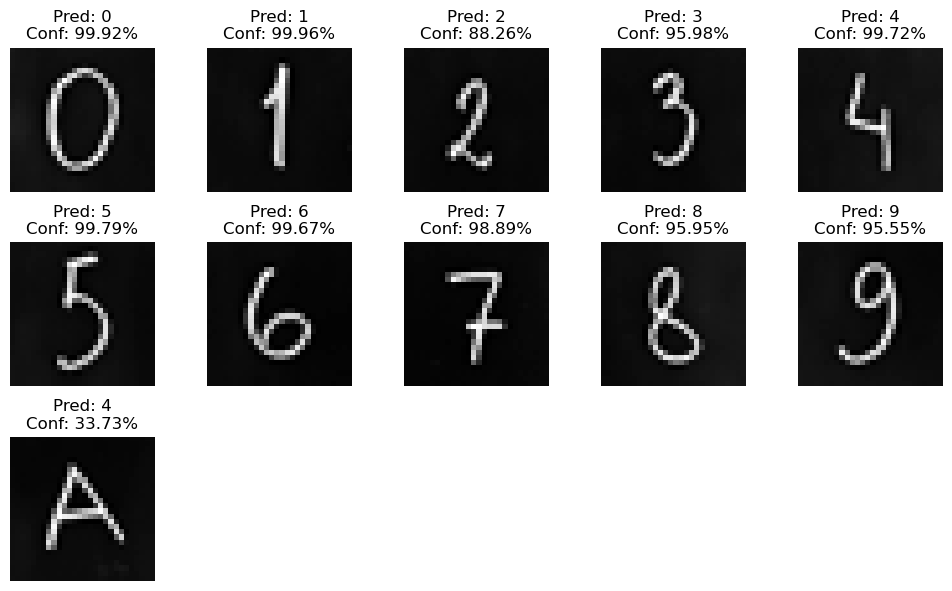

In [250]:
import math
import matplotlib.pyplot as plt

# Number of images
num_images = len(image_files)

# Calculate number of rows (5 images per row)
cols = 5
rows = math.ceil(num_images / cols)

plt.figure(figsize=(cols * 2, rows * 2))

for i, (filename, pred, conf) in enumerate(zip(image_files, predicted_classes, confidence_scores)):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {pred}\nConf: {conf:.2%}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [252]:
# Show results
for filename, pred in zip(image_files, predicted_classes):
    print(f"{filename}: Predicted digit {pred}")

0.JPG: Predicted digit 0
1.JPG: Predicted digit 1
2.JPG: Predicted digit 2
3.JPG: Predicted digit 3
4.JPG: Predicted digit 4
5.JPG: Predicted digit 5
6.JPG: Predicted digit 6
7.JPG: Predicted digit 7
8.JPG: Predicted digit 8
9.JPG: Predicted digit 9
10.JPG: Predicted digit 4


In [254]:
# Simuli saved as '10' is actually letter A. The model classified it as "4", which is actually quite close. 

The model showed perfect performance in identifying numbers written by me. It also identified letter A as the number which looks the closest, number 4. 